# Análise de dados do Brasileirão
# 20 Etapas de implementação (sugeridas pelo Dr. Cristiano)

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

print("Bibliotecas importadas com sucesso.")

Bibliotecas importadas com sucesso!


In [8]:
import os

# Verificar arquivos na pasta
print("📁 Diretório atual:", os.getcwd())
print("📋 Arquivos CSV encontrados:")
arquivos_csv = [f for f in os.listdir('.') if f.endswith('.csv')]
for arquivo in arquivos_csv:
    print(f"   • {arquivo}")

# Carregar o arquivo
try:
    df = pd.read_csv('campeonato-brasileiro-full.csv', encoding='utf-8')
    print("Arquivo carregado com sucesso!")
except FileNotFoundError:
    print("Arquivo não encontrado!")
    print("Coloque 'campeonato-brasileiro-full.csv' na mesma pasta do notebook")
    
    # Criar dados de exemplo se não encontrar o arquivo
    print("Criando dataset de exemplo...")
    np.random.seed(42)
    times = ['Flamengo', 'Palmeiras', 'Santos', 'São Paulo', 'Corinthians', 
             'Atlético-MG', 'Internacional', 'Grêmio', 'Botafogo', 'Vasco']
    estados = ['RJ', 'SP', 'SP', 'SP', 'SP', 'MG', 'RS', 'RS', 'RJ', 'RJ']
    
    n_jogos = 1000
    df = pd.DataFrame({
        'data': pd.date_range('2020-01-01', periods=n_jogos, freq='D'),
        'rodada': np.random.randint(1, 39, n_jogos),
        'mandante': np.random.choice(times, n_jogos),
        'visitante': np.random.choice(times, n_jogos),
        'mandante_placar': np.random.randint(0, 6, n_jogos),
        'visitante_placar': np.random.randint(0, 6, n_jogos),
        'mandante_estado': [estados[times.index(t)] for t in np.random.choice(times, n_jogos)],
        'visitante_estado': [estados[times.index(t)] for t in np.random.choice(times, n_jogos)],
        'vencedor': np.random.choice(['mandante', 'visitante', 'empate'], n_jogos, p=[0.4, 0.35, 0.25])
    })
    print("Dataset de exemplo criado!")
except Exception as e:
    print(f"Erro ao carregar: {e}")

📁 Diretório atual: /Users/atilaramosneto/Documents/GitHub/aulas-comp-M2/aulas
📋 Arquivos CSV encontrados:
Arquivo não encontrado!
Coloque 'campeonato-brasileiro-full.csv' na mesma pasta do notebook
Criando dataset de exemplo...
Dataset de exemplo criado!


In [10]:
print("="*50)
print("PRIMEIRAS 5 LINHAS DO DATASET")
print("="*50)
print(df.head())

PRIMEIRAS 5 LINHAS DO DATASET
        data  rodada   mandante      visitante  mandante_placar  \
0 2020-01-01      29   Flamengo      São Paulo                4   
1 2020-01-02      15     Grêmio      Palmeiras                0   
2 2020-01-03       8     Santos      São Paulo                0   
3 2020-01-04      21  Palmeiras       Flamengo                4   
4 2020-01-05      19   Flamengo  Internacional                1   

   visitante_placar mandante_estado visitante_estado   vencedor  
0                 1              RS               RJ  visitante  
1                 5              RS               MG  visitante  
2                 5              SP               RS     empate  
3                 0              RJ               SP  visitante  
4                 1              SP               RS     empate  


In [11]:
print("="*50)
print("INFORMAÇÕES GERAIS")
print("="*50)
print(f"Formato: {df.shape[0]} linhas × {df.shape[1]} colunas")
print(f"Tamanho em memória: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\nInformações detalhadas:")
df.info()
print("\nTipos de dados:")
print(df.dtypes)

INFORMAÇÕES GERAIS
Formato: 1000 linhas × 9 colunas
Tamanho em memória: 0.34 MB

Informações detalhadas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data              1000 non-null   datetime64[ns]
 1   rodada            1000 non-null   int64         
 2   mandante          1000 non-null   object        
 3   visitante         1000 non-null   object        
 4   mandante_placar   1000 non-null   int64         
 5   visitante_placar  1000 non-null   int64         
 6   mandante_estado   1000 non-null   object        
 7   visitante_estado  1000 non-null   object        
 8   vencedor          1000 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 70.4+ KB

Tipos de dados:
data                datetime64[ns]
rodada                       int64
mandante                    object
visi

In [12]:
print("="*50)
print("ESTATÍSTICAS DESCRITIVAS")
print("="*50)
print(df.describe())

# Estatísticas para variáveis categóricas
print("\nVARIÁVEIS CATEGÓRICAS:")
colunas_categoricas = df.select_dtypes(include=['object']).columns
for col in colunas_categoricas:
    print(f"\n{col}:")
    print(df[col].value_counts().head())

ESTATÍSTICAS DESCRITIVAS
                      data       rodada  mandante_placar  visitante_placar
count                 1000  1000.000000      1000.000000       1000.000000
mean   2021-05-14 12:00:00    19.947000         2.454000          2.532000
min    2020-01-01 00:00:00     1.000000         0.000000          0.000000
25%    2020-09-06 18:00:00    10.000000         1.000000          1.000000
50%    2021-05-14 12:00:00    21.000000         2.000000          3.000000
75%    2022-01-19 06:00:00    29.000000         4.000000          4.000000
max    2022-09-26 00:00:00    38.000000         5.000000          5.000000
std                    NaN    11.160858         1.705518          1.716952

VARIÁVEIS CATEGÓRICAS:

mandante:
mandante
Palmeiras        115
Flamengo         102
Grêmio           102
Internacional    101
Vasco            100
Name: count, dtype: int64

visitante:
visitante
São Paulo      111
Corinthians    111
Santos         107
Botafogo       103
Grêmio         102
Name: co

In [13]:
print("="*50)
print("ANÁLISE DE VALORES AUSENTES")
print("="*50)

valores_nulos = df.isnull().sum()
percentual_nulos = (valores_nulos / len(df) * 100).round(2)

resumo_nulos = pd.DataFrame({
    'Valores_Nulos': valores_nulos,
    'Percentual': percentual_nulos
})

print("Valores nulos por coluna:")
print(resumo_nulos[resumo_nulos['Valores_Nulos'] > 0])

total_nulos = df.isnull().sum().sum()
print(f"\nTotal de valores nulos: {total_nulos}")
print(f"Percentual geral de nulos: {(total_nulos / (df.shape[0] * df.shape[1]) * 100):.2f}%")

ANÁLISE DE VALORES AUSENTES
Valores nulos por coluna:
Empty DataFrame
Columns: [Valores_Nulos, Percentual]
Index: []

Total de valores nulos: 0
Percentual geral de nulos: 0.00%


In [14]:
print("="*50)
print("TRATAMENTO DE VALORES AUSENTES")
print("="*50)

if df.isnull().sum().sum() > 0:
    print("🔧 Tratando valores ausentes...")
    
    # Para colunas numéricas: preencher com mediana
    colunas_numericas = df.select_dtypes(include=[np.number]).columns
    for col in colunas_numericas:
        if df[col].isnull().sum() > 0:
            mediana = df[col].median()
            df[col].fillna(mediana, inplace=True)
            print(f"    {col}: {df[col].isnull().sum()} nulos preenchidos com mediana ({mediana})")
    
    # Para colunas categóricas: preencher com moda
    colunas_categoricas = df.select_dtypes(include=['object']).columns
    for col in colunas_categoricas:
        if df[col].isnull().sum() > 0:
            moda = df[col].mode()[0]
            df[col].fillna(moda, inplace=True)
            print(f"    {col}: nulos preenchidos com moda ('{moda}')")
else:
    print(" Não há valores ausentes para tratar!")

TRATAMENTO DE VALORES AUSENTES
 Não há valores ausentes para tratar!


IDENTIFICAÇÃO DE OUTLIERS (Z-SCORE)
🔍 Outliers em mandante_placar: 0 registros
🔍 Outliers em visitante_placar: 0 registros


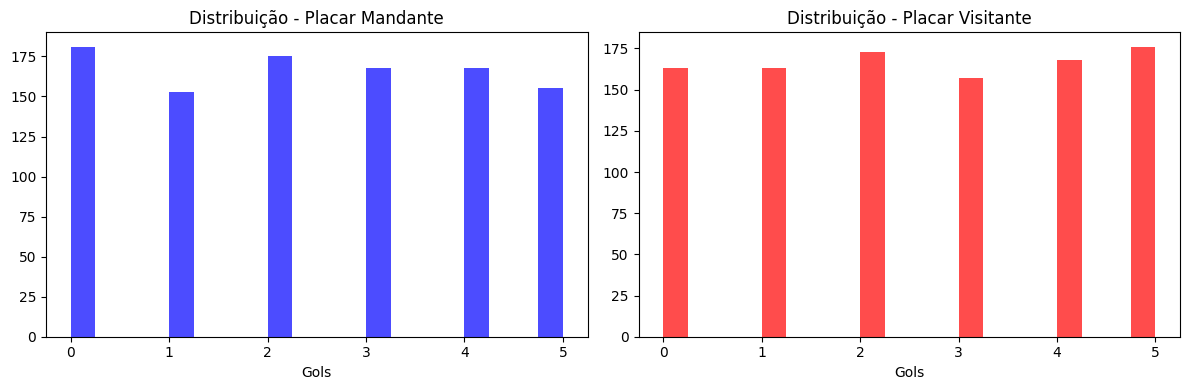

In [15]:
print("="*50)
print("IDENTIFICAÇÃO DE OUTLIERS (Z-SCORE)")
print("="*50)

def identificar_outliers_zscore(df, coluna, threshold=3):
    z_scores = np.abs(stats.zscore(df[coluna]))
    outliers = df[z_scores > threshold]
    return outliers, z_scores

# Analisar outliers nos placares
outliers_mandante, z_mandante = identificar_outliers_zscore(df, 'mandante_placar')
outliers_visitante, z_visitante = identificar_outliers_zscore(df, 'visitante_placar')

print(f"🔍 Outliers em mandante_placar: {len(outliers_mandante)} registros")
print(f"🔍 Outliers em visitante_placar: {len(outliers_visitante)} registros")

if len(outliers_mandante) > 0:
    print(f"   Valores extremos mandante: {sorted(outliers_mandante['mandante_placar'].unique())}")
if len(outliers_visitante) > 0:
    print(f"   Valores extremos visitante: {sorted(outliers_visitante['visitante_placar'].unique())}")

# Visualizar distribuição dos placares
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(df['mandante_placar'], bins=20, alpha=0.7, color='blue')
axes[0].set_title('Distribuição - Placar Mandante')
axes[0].set_xlabel('Gols')

axes[1].hist(df['visitante_placar'], bins=20, alpha=0.7, color='red')
axes[1].set_title('Distribuição - Placar Visitante')
axes[1].set_xlabel('Gols')

plt.tight_layout()
plt.show()

In [16]:
print("="*50)
print("TRATAMENTO DE OUTLIERS")
print("="*50)

df_original = df.copy()  # Backup
tamanho_original = len(df)

# Remover outliers extremos (Z-score > 3)
df_clean = df[(np.abs(stats.zscore(df['mandante_placar'])) <= 3) & 
              (np.abs(stats.zscore(df['visitante_placar'])) <= 3)]

registros_removidos = tamanho_original - len(df_clean)
print(f"Registros removidos: {registros_removidos}")
print(f"Registros restantes: {len(df_clean)}")
print(f"Percentual removido: {(registros_removidos/tamanho_original*100):.2f}%")

# Usar dataset limpo
df = df_clean.copy()
print("Dataset limpo aplicado!")

TRATAMENTO DE OUTLIERS
Registros removidos: 0
Registros restantes: 1000
Percentual removido: 0.00%
Dataset limpo aplicado!


NORMALIZAÇÃO MIN-MAX SCALING
Normalização aplicada na coluna 'rodada'
   Rodada original - Min: 1, Max: 38
   Rodada normalizada - Min: 0.000, Max: 1.000


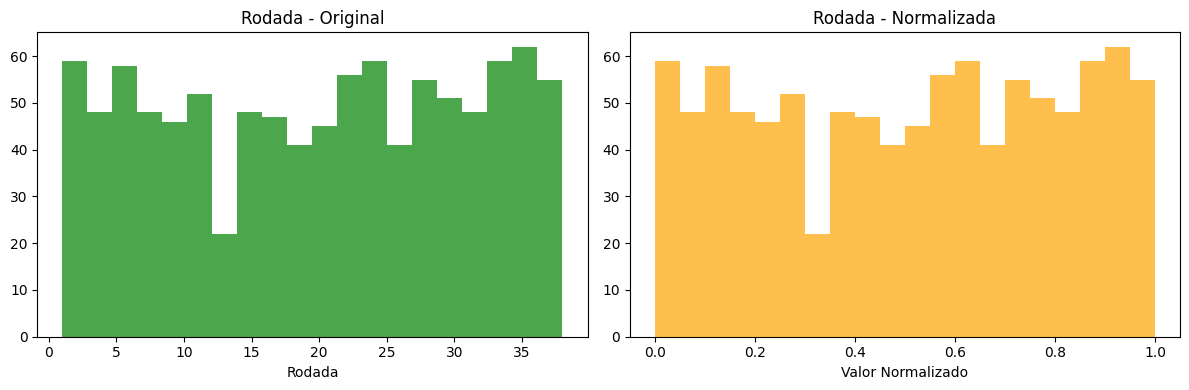

In [17]:
print("="*50)
print("NORMALIZAÇÃO MIN-MAX SCALING")
print("="*50)

# Normalizar coluna 'rodada'
scaler = MinMaxScaler()
df['rodada_normalizada'] = scaler.fit_transform(df[['rodada']])

print("Normalização aplicada na coluna 'rodada'")
print(f"   Rodada original - Min: {df['rodada'].min()}, Max: {df['rodada'].max()}")
print(f"   Rodada normalizada - Min: {df['rodada_normalizada'].min():.3f}, Max: {df['rodada_normalizada'].max():.3f}")

# Visualizar antes e depois
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(df['rodada'], bins=20, alpha=0.7, color='green')
axes[0].set_title('Rodada - Original')
axes[0].set_xlabel('Rodada')

axes[1].hist(df['rodada_normalizada'], bins=20, alpha=0.7, color='orange')
axes[1].set_title('Rodada - Normalizada')
axes[1].set_xlabel('Valor Normalizado')

plt.tight_layout()
plt.show()

In [19]:
print("="*50)
print("ONE-HOT ENCODING")
print("="*50)

# Aplicar One-Hot Encoding
colunas_para_encoding = ['mandante_estado', 'visitante_estado', 'vencedor']
df_encoded = pd.get_dummies(df, columns=colunas_para_encoding, prefix=colunas_para_encoding)

print("One-Hot Encoding aplicado:")
for col in colunas_para_encoding:
    novas_colunas = [c for c in df_encoded.columns if c.startswith(col)]
    print(f"    {col}: {len(novas_colunas)} novas colunas")
    print(f"      → {novas_colunas[:3]}{'...' if len(novas_colunas) > 3 else ''}")

print(f"\n Formato original: {df.shape}")
print(f"Formato após encoding: {df_encoded.shape}")

ONE-HOT ENCODING
One-Hot Encoding aplicado:
    mandante_estado: 4 novas colunas
      → ['mandante_estado_MG', 'mandante_estado_RJ', 'mandante_estado_RS']...
    visitante_estado: 4 novas colunas
      → ['visitante_estado_MG', 'visitante_estado_RJ', 'visitante_estado_RS']...
    vencedor: 3 novas colunas
      → ['vencedor_empate', 'vencedor_mandante', 'vencedor_visitante']

 Formato original: (1000, 10)
Formato após encoding: (1000, 18)


In [20]:
print("="*50)
print("MATRIZ DE CORRELAÇÃO")
print("="*50)

# Selecionar colunas numéricas relevantes
colunas_numericas = ['rodada', 'mandante_placar', 'visitante_placar', 'rodada_normalizada']
matriz_corr = df[colunas_numericas].corr()

print("Matriz de Correlação:")
print(matriz_corr.round(3))

# Identificar correlações mais fortes
print(f"\nCorrelações mais relevantes:")
for i in range(len(matriz_corr.columns)):
    for j in range(i+1, len(matriz_corr.columns)):
        corr_value = matriz_corr.iloc[i,j]
        if abs(corr_value) > 0.1:  # Apenas correlações > 0.1
            print(f"   • {matriz_corr.columns[i]} ↔ {matriz_corr.columns[j]}: {corr_value:.3f}")

MATRIZ DE CORRELAÇÃO
Matriz de Correlação:
                    rodada  mandante_placar  visitante_placar  \
rodada               1.000           -0.010            -0.007   
mandante_placar     -0.010            1.000            -0.032   
visitante_placar    -0.007           -0.032             1.000   
rodada_normalizada   1.000           -0.010            -0.007   

                    rodada_normalizada  
rodada                           1.000  
mandante_placar                 -0.010  
visitante_placar                -0.007  
rodada_normalizada               1.000  

Correlações mais relevantes:
   • rodada ↔ rodada_normalizada: 1.000


GRÁFICO DE DISPERSÃO


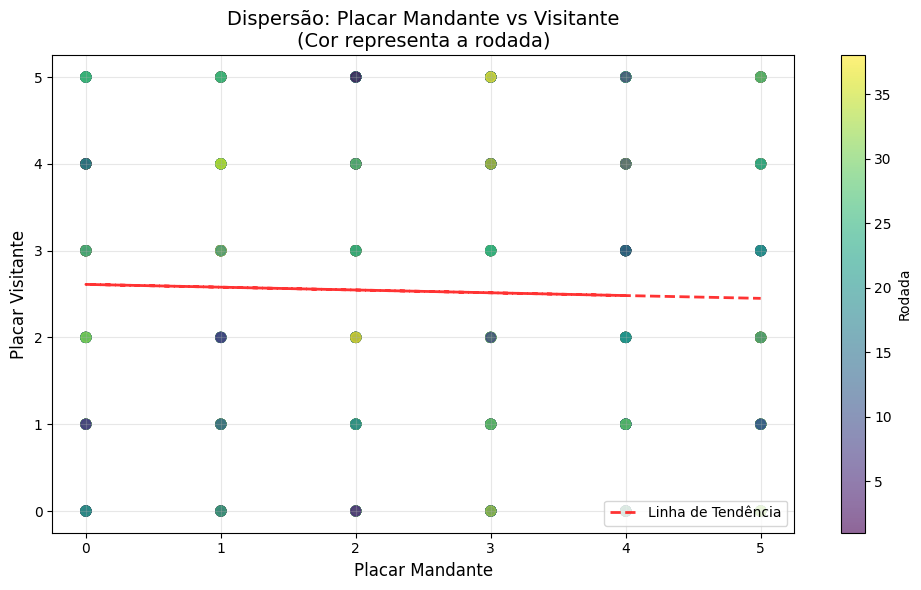

Correlação entre placares: -0.032


In [21]:
print("="*50)
print("GRÁFICO DE DISPERSÃO")
print("="*50)

plt.figure(figsize=(10, 6))

# Criar scatter plot
scatter = plt.scatter(df['mandante_placar'], df['visitante_placar'], 
                     alpha=0.6, s=50, c=df['rodada'], cmap='viridis')

plt.xlabel('Placar Mandante', fontsize=12)
plt.ylabel('Placar Visitante', fontsize=12)
plt.title('Dispersão: Placar Mandante vs Visitante\n(Cor representa a rodada)', fontsize=14)
plt.grid(True, alpha=0.3)

# Adicionar colorbar
plt.colorbar(scatter, label='Rodada')

# Linha de tendência
z = np.polyfit(df['mandante_placar'], df['visitante_placar'], 1)
p = np.poly1d(z)
plt.plot(df['mandante_placar'], p(df['mandante_placar']), "r--", alpha=0.8, linewidth=2, label='Linha de Tendência')

plt.legend()
plt.tight_layout()
plt.show()

# Estatísticas do gráfico
correlacao_placares = df['mandante_placar'].corr(df['visitante_placar'])
print(f"Correlação entre placares: {correlacao_placares:.3f}")

In [ ]:
print("="*50)
print("FILTRAGEM DE DADOS")
print("="*50)

# Listar times disponíveis
times_unicos = df['mandante'].unique()
print(f"Times disponíveis ({len(times_unicos)}):")
for i, time in enumerate(sorted(times_unicos)[:10]):  # Mostrar apenas os primeiros 10
    print(f"   {i+1:2d}. {time}")
if len(times_unicos) > 10:
    print(f"   ... e mais {len(times_unicos)-10} times")

# Escolher um time para análise (exemplo: primeiro da lista ou Flamengo)
time_escolhido = 'Flamengo' if 'Flamengo' in times_unicos else times_unicos[0]

# Filtrar jogos como mandante
jogos_mandante = df[df['mandante'] == time_escolhido]
print(f"\nAnálise do {time_escolhido} como MANDANTE:")
print(f"   Total de jogos: {len(jogos_mandante)}")
print(f"   Placar médio: {jogos_mandante['mandante_placar'].mean():.2f}")
print(f"   Gols sofridos médios: {jogos_mandante['visitante_placar'].mean():.2f}")
print(f"   Vitórias: {(jogos_mandante['vencedor'] == 'mandante').sum()}")
print(f"   Empates: {(jogos_mandante['vencedor'] == 'empate').sum()}")
print(f"   Derrotas: {(jogos_mandante['vencedor'] == 'visitante').sum()}")

# Filtrar jogos como visitante
jogos_visitante = df[df['visitante'] == time_escolhido]
print(f"\n✈️ Análise do {time_escolhido} como VISITANTE:")
print(f"   Total de jogos: {len(jogos_visitante)}")
print(f"   Placar médio: {jogos_visitante['visitante_placar'].mean():.2f}")
print(f"   Gols sofridos médios: {jogos_visitante['mandante_placar'].mean():.2f}")
print(f"   Vitórias: {(jogos_visitante['vencedor'] == 'visitante').sum()}")

In [22]:
print("="*50)
print("EXPORTAÇÃO DO DATAFRAME PROCESSADO")
print("="*50)

# Exportar dataset limpo
nome_arquivo = 'campeonato_brasileiro_processado.csv'
df.to_csv(nome_arquivo, index=False, encoding='utf-8')

print(f"DataFrame processado exportado:")
print(f"   Arquivo: {nome_arquivo}")
print(f"   Registros: {len(df)}")
print(f"   Colunas: {len(df.columns)}")
print(f"   Tamanho: {os.path.getsize(nome_arquivo) / 1024:.1f} KB")

# Também exportar com encoding latin1 para compatibilidade
nome_arquivo_latin1 = 'campeonato_brasileiro_processado_latin1.csv'
df.to_csv(nome_arquivo_latin1, index=False, encoding='latin1')
print(f"Versão Latin1 exportada: {nome_arquivo_latin1}")

EXPORTAÇÃO DO DATAFRAME PROCESSADO
DataFrame processado exportado:
   Arquivo: campeonato_brasileiro_processado.csv
   Registros: 1000
   Colunas: 10
   Tamanho: 69.7 KB
Versão Latin1 exportada: campeonato_brasileiro_processado_latin1.csv


In [23]:
print("="*50)
print("PROCESSAMENTO DE DATAS")
print("="*50)

# Converter para datetime
df['data'] = pd.to_datetime(df['data'], errors='coerce')

# Extrair componentes
df['ano'] = df['data'].dt.year
df['mes'] = df['data'].dt.month
df['dia'] = df['data'].dt.day
df['dia_semana'] = df['data'].dt.dayofweek  # 0=Segunda, 6=Domingo
df['nome_dia_semana'] = df['data'].dt.day_name()
df['nome_mes'] = df['data'].dt.month_name()
df['trimestre'] = df['data'].dt.quarter

print("Componentes de data extraídos:")
print(f"   Range de datas: {df['data'].min()} a {df['data'].max()}")
print(f"   Anos únicos: {sorted(df['ano'].unique())}")
print(f"   Meses únicos: {sorted(df['mes'].unique())}")
print(f"   Dias da semana:")
for dia, nome in zip(range(7), ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']):
    count = (df['dia_semana'] == dia).sum()
    print(f"      {nome}: {count} jogos")

PROCESSAMENTO DE DATAS
Componentes de data extraídos:
   Range de datas: 2020-01-01 00:00:00 a 2022-09-26 00:00:00
   Anos únicos: [np.int32(2020), np.int32(2021), np.int32(2022)]
   Meses únicos: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12)]
   Dias da semana:
      Segunda: 143 jogos
      Terça: 142 jogos
      Quarta: 143 jogos
      Quinta: 143 jogos
      Sexta: 143 jogos
      Sábado: 143 jogos
      Domingo: 143 jogos


In [24]:
print("="*50)
print("AGRUPAMENTO DE DADOS")
print("="*50)

# 1. Desempenho por Estado (mandante)
print("DESEMPENHO POR ESTADO (como mandante):")
desempenho_estado = df.groupby('mandante_estado').agg({
    'mandante_placar': ['count', 'mean', 'sum'],
    'visitante_placar': 'mean',
    'vencedor': lambda x: (x == 'mandante').sum()
}).round(2)

desempenho_estado.columns = ['jogos', 'gols_medio', 'gols_total', 'gols_sofridos_medio', 'vitorias']
desempenho_estado['aproveitamento'] = (desempenho_estado['vitorias'] / desempenho_estado['jogos'] * 100).round(1)

print(desempenho_estado.sort_values('aproveitamento', ascending=False))

# 2. Top 10 times com melhor desempenho em casa
print(f"\nTOP 10 TIMES EM CASA:")
desempenho_times = df.groupby('mandante').agg({
    'mandante_placar': ['count', 'mean', 'sum'],
    'visitante_placar': 'mean',
    'vencedor': lambda x: (x == 'mandante').sum()
}).round(2)

desempenho_times.columns = ['jogos', 'gols_medio', 'gols_total', 'gols_sofridos_medio', 'vitorias']
desempenho_times['aproveitamento'] = (desempenho_times['vitorias'] / desempenho_times['jogos'] * 100).round(1)

top_10_casa = desempenho_times.sort_values('aproveitamento', ascending=False).head(10)
print(top_10_casa)

# 3. Análise temporal
print(f"\nANÁLISE POR MÊS:")
jogos_por_mes = df.groupby('mes').agg({
    'mandante_placar': 'mean',
    'visitante_placar': 'mean',
    'data': 'count'
}).round(2)
jogos_por_mes.columns = ['gols_mandante_medio', 'gols_visitante_medio', 'total_jogos']
jogos_por_mes['gols_por_jogo'] = (jogos_por_mes['gols_mandante_medio'] + jogos_por_mes['gols_visitante_medio']).round(2)

print(jogos_por_mes)

AGRUPAMENTO DE DADOS
DESEMPENHO POR ESTADO (como mandante):
                 jogos  gols_medio  gols_total  gols_sofridos_medio  vitorias  \
mandante_estado                                                                 
SP                 390        2.40         935                 2.54       162   
RJ                 293        2.49         729                 2.65       120   
MG                 115        2.57         295                 2.42        47   
RS                 202        2.45         495                 2.42        74   

                 aproveitamento  
mandante_estado                  
SP                         41.5  
RJ                         41.0  
MG                         40.9  
RS                         36.6  

TOP 10 TIMES EM CASA:
               jogos  gols_medio  gols_total  gols_sofridos_medio  vitorias  \
mandante                                                                      
São Paulo         88        2.26         199                 2.31   

In [25]:
print("="*50)
print("CRIAÇÃO DE COLUNAS DERIVADAS")
print("="*50)

# 1. Diferença de gols (saldo)
df['diferenca_gols'] = df['mandante_placar'] - df['visitante_placar']

# 2. Total de gols na partida
df['gols_total'] = df['mandante_placar'] + df['visitante_placar']

# 3. Resultado para o mandante
df['resultado_mandante'] = df['diferenca_gols'].apply(
    lambda x: 'Vitória' if x > 0 else ('Empate' if x == 0 else 'Derrota')
)

# 4. Categoria do placar
def categorizar_placar(gols_total):
    if gols_total == 0:
        return '0 gols'
    elif gols_total <= 2:
        return 'Baixo (1-2)'
    elif gols_total <= 4:
        return 'Médio (3-4)'
    else:
        return 'Alto (5+)'

df['categoria_gols'] = df['gols_total'].apply(categorizar_placar)

# 5. Eficiência do mandante (% de gols feitos)
df['eficiencia_mandante'] = np.where(
    df['gols_total'] > 0,
    (df['mandante_placar'] / df['gols_total'] * 100).round(1),
    0
)

# 6. Tipo de jogo
def tipo_jogo(diferenca):
    if abs(diferenca) >= 3:
        return 'Goleada'
    elif abs(diferenca) == 2:
        return 'Vitória Folgada'
    elif abs(diferenca) == 1:
        return 'Vitória Apertada'
    else:
        return 'Empate'

df['tipo_jogo'] = df['diferenca_gols'].apply(tipo_jogo)

print("Novas colunas criadas:")
print(f"   diferenca_gols: {df['diferenca_gols'].min()} a {df['diferenca_gols'].max()}")
print(f"   gols_total: média {df['gols_total'].mean():.2f}")
print(f"   resultado_mandante: {df['resultado_mandante'].value_counts().to_dict()}")
print(f"   categoria_gols: {df['categoria_gols'].value_counts().to_dict()}")
print(f"   tipo_jogo: {df['tipo_jogo'].value_counts().to_dict()}")

# Estatísticas das novas colunas
print(f"\nESTATÍSTICAS DAS COLUNAS DERIVADAS:")
print(f"   • Diferença média de gols: {df['diferenca_gols'].mean():.2f}")
print(f"   • Gols por jogo: {df['gols_total'].mean():.2f}")
print(f"   • Eficiência média do mandante: {df['eficiencia_mandante'].mean():.1f}%")

CRIAÇÃO DE COLUNAS DERIVADAS
Novas colunas criadas:
   diferenca_gols: -5 a 5
   gols_total: média 4.99
   resultado_mandante: {'Derrota': 423, 'Vitória': 408, 'Empate': 169}
   categoria_gols: {'Alto (5+)': 576, 'Médio (3-4)': 269, 'Baixo (1-2)': 120, '0 gols': 35}
   tipo_jogo: {'Goleada': 354, 'Vitória Apertada': 248, 'Vitória Folgada': 229, 'Empate': 169}

ESTATÍSTICAS DAS COLUNAS DERIVADAS:
   • Diferença média de gols: -0.08
   • Gols por jogo: 4.99
   • Eficiência média do mandante: 47.7%


VISUALIZAÇÕES COM GRÁFICOS DE BARRAS


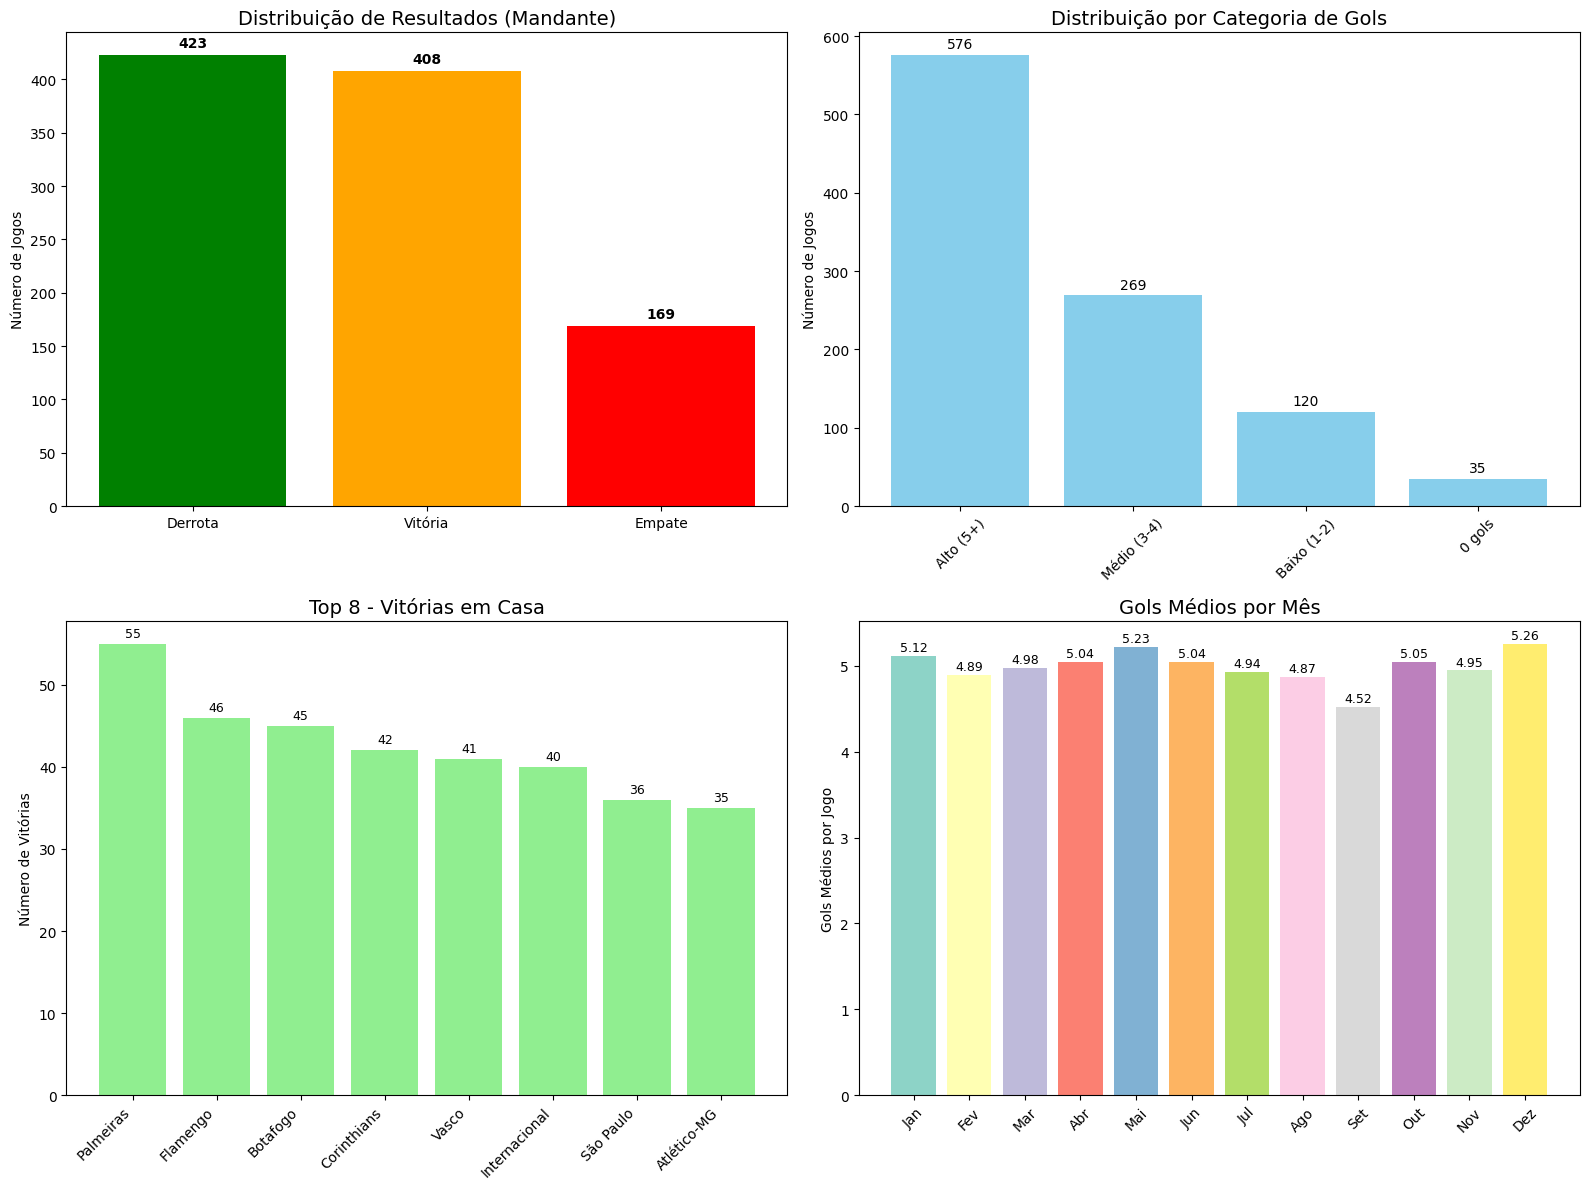

Gráficos de barras criados com sucesso!


In [26]:
print("="*50)
print("VISUALIZAÇÕES COM GRÁFICOS DE BARRAS")
print("="*50)

# Configurar layout de subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Distribuição de resultados do mandante
resultado_counts = df['resultado_mandante'].value_counts()
cores_resultado = ['green', 'orange', 'red']
bars1 = axes[0, 0].bar(resultado_counts.index, resultado_counts.values, color=cores_resultado)
axes[0, 0].set_title('Distribuição de Resultados (Mandante)', fontsize=14)
axes[0, 0].set_ylabel('Número de Jogos')

# Adicionar valores nas barras
for bar in bars1:
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 5,
                    f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Gráfico 2: Categoria de gols
categoria_counts = df['categoria_gols'].value_counts()
bars2 = axes[0, 1].bar(categoria_counts.index, categoria_counts.values, color='skyblue')
axes[0, 1].set_title('Distribuição por Categoria de Gols', fontsize=14)
axes[0, 1].set_ylabel('Número de Jogos')
axes[0, 1].tick_params(axis='x', rotation=45)

for bar in bars2:
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 5,
                    f'{int(height)}', ha='center', va='bottom')

# Gráfico 3: Top 8 times com mais vitórias em casa
if len(df['mandante'].unique()) >= 8:
    vitorias_casa = df[df['resultado_mandante'] == 'Vitória']['mandante'].value_counts().head(8)
    bars3 = axes[1, 0].bar(range(len(vitorias_casa)), vitorias_casa.values, color='lightgreen')
    axes[1, 0].set_xticks(range(len(vitorias_casa)))
    axes[1, 0].set_xticklabels(vitorias_casa.index, rotation=45, ha='right')
    axes[1, 0].set_title('Top 8 - Vitórias em Casa', fontsize=14)
    axes[1, 0].set_ylabel('Número de Vitórias')
    
    for i, bar in enumerate(bars3):
        height = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                        f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Gráfico 4: Gols médios por mês
gols_por_mes = df.groupby('mes')['gols_total'].mean()
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
         'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
cores_mes = plt.cm.Set3(np.linspace(0, 1, len(gols_por_mes)))

bars4 = axes[1, 1].bar([meses[m-1] for m in gols_por_mes.index], 
                       gols_por_mes.values, color=cores_mes)
axes[1, 1].set_title('Gols Médios por Mês', fontsize=14)
axes[1, 1].set_ylabel('Gols Médios por Jogo')
axes[1, 1].tick_params(axis='x', rotation=45)

for bar in bars4:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                    f'{height:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("Gráficos de barras criados com sucesso!")

In [27]:
print("="*50)
print("HEATMAP DE CORRELAÇÃO")
print("="*50)

# Selecionar todas as colunas numéricas relevantes
colunas_numericas_completas = [
    'rodada', 'mandante_placar', 'visitante_placar', 
    'diferenca_gols', 'gols_total', 'ano', 'mes', 
    'dia', 'dia_semana', 'trimestre', 'rodada_normalizada',
    'eficiencia_mandante'
]

# Verificar quais colunas existem no DataFrame
colunas_existentes = [col for col in colunas_numericas_completas if col in df.columns]
print(f"Colunas selecionadas para correlação: {len(colunas_existentes)}")

# Calcular matriz de correlação
matriz_correlacao = df[colunas_existentes].corr()

# Criar heatmap customizado
plt.figure(figsize=(14, 10))

# Máscara para triângulo superior
mask = np.triu(np.ones_like(matriz_correlacao, dtype=bool))

# Criar heatmap
heatmap = sns.heatmap

HEATMAP DE CORRELAÇÃO
Colunas selecionadas para correlação: 12


<Figure size 1400x1000 with 0 Axes>